# **1. Dataset Selection:**
[link to the dataset](https://www.kaggle.com/datasets/jakubkhalponiak/phones-2024/data)

The dataaet we chose contains cleaned and processed data on phones, with information from various e-commerce platforms.

**Columns:**
* phone_brand:
The manufacturer or brand of the phone (e.g., Apple, Samsung, Xiaomi).

* phone_model:
The specific model name or number of the phone.

* store:
The specific store where the phone is listed.

* price:
The price of the phone as a floating-point number in the native currency. This column should always be analyzed together with the currency column.

* currency:
The currency in which the price is set (e.g., USD, EUR).

* **price_USD(target)**:
The price of the phone converted to USD.

* storage:
The amount of storage in GB (integer).

* ram:
The amount of RAM in GB (integer).

* Launch:
The launch date of the phone (in datetime format).

* Dimensions:
The exact dimensions of the phone, for example: 163.8 x 76.8 x 8.9 mm (6.45 x 3.02 x 0.35 in).

* Weight:
The weight of the phone in grams (float).

* Display_Type:
The type of display, for example: LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolby Vision, 1000 nits (typ), 2000 nits (HBM).

* Display_Size:
The display size in inches.

* Display_Resolution:
The resolution of the display, for example: 1280 x 2856.

* OS:
The operating system of the phone, for example: iOS 18, Android 14.

* NFC:
A flag indicating whether the phone has NFC:
1 - Has NFC,
0 - Does not have NFC.

* USB:
The USB type, for example: USB Type-C 3.2 Gen 2, DisplayPort.

* BATTERY:
The battery capacity in mAh.

* Features_Sensors:
Features and sensors included in the phone.

* Colors:
The color options for the phone model, for example: Black Titanium, White Titanium, Natural Titanium, Desert Titanium.

* Video:
Camera specifications for video recording, for example: 4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/240fps, 10-bit HDR, Dolby Vision HDR (up to 60fps), ProRes, 3D (spatial) video/audio, stereo sound rec.

* Chipset:
The chipset used in the phone, for example: Apple A18 Pro (3 nm).

* CPU:
The CPU specifications, for example: Hexa-core (2x4.05 GHz + 4x2.42 GHz).

* GPU:
The GPU specifications, for example: Apple GPU (6-core graphics).

* Year:
The year in which the phone model was released.

* Foldable:
A flag indicating whether the phone is foldable:
1 - Phone is foldable,
0 - Phone is not foldable.

* PPI_Density:
The pixel density in pixels per inch (ppi).

* quantile_10:
The 10th quantile of the price for phones in a given year.

* quantile_50:
The 50th quantile (median) of the price for phones in a given year.

* quantile_90:
The 90th quantile of the price for phones in a given year.

* price_range:
Price range classification (low price, medium price, high price), based on quantiles in a given year.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings("ignore")
dtf = pd.read_csv("/content/processed_data2.csv")
cols = dtf.columns.tolist()
dtf = dtf[cols]
dtf.describe()

,price_usd,storage,ram,weight,display_size,nfc,battery,foldable,ppi_density,quantile_10,quantile_50,quantile_90,colors_available
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000
mean,419.983156,271.798595,7.981265,195.203769,6.564754,0.917447,4657.326698,0.048595,403.826112,125.729804,313.998214,854.838389,3.767564
std,361.680703,207.513099,3.425618,24.738661,0.383238,0.275286,694.689807,0.215082,71.794438,17.976906,113.940350,298.836329,1.551824
min,52.630000,32.000000,2.000000,135.000000,4.700000,0.000000,1821.000000,0.000000,179.000000,100.800000,196.810000,224.154000,1.000000
25%,167.562500,128.000000,6.000000,183.500000,6.500000,1.000000,4500.000000,0.000000,393.000000,114.990000,246.270000,581.990000,3.000000
50%,278.835000,256.000000,8.000000,193.500000,6.600000,1.000000,5000.000000,0.000000,402.000000,118.514000,249.990000,790.560000,3.000000
75%,550.327500,256.000000,12.000000,204.000000,6.700000,1.000000,5000.000000,0.000000,446.000000,127.030000,329.990000,999.990000,4.000000
max,2353.820000,1000.000000,24.000000,627.000000,12.400000,1.000000,10200.000000,1.000000,643.000000,169.706000,550.450000,1375.350000,11.000000


In [26]:
print(dtf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phone_brand         1708 non-null   object 
 1   phone_model         1708 non-null   object 
 2   store               1708 non-null   object 
 3   price_usd           1708 non-null   float64
 4   storage             1708 non-null   int64  
 5   ram                 1708 non-null   int64  
 6   launch_date         1708 non-null   object 
 7   dimensions          1708 non-null   object 
 8   weight              1708 non-null   float64
 9   display_type        1708 non-null   object 
 10  display_size        1708 non-null   float64
 11  display_resolution  1708 non-null   object 
 12  os                  1708 non-null   object 
 13  nfc                 1708 non-null   int64  
 14  usb                 1708 non-null   object 
 15  battery             1708 non-null   int64  
 16  featur

storage             0.670854
ram                 0.554755
foldable            0.406040
ppi_density         0.399921
quantile_90         0.376696
quantile_50         0.375034
weight              0.346632
quantile_10         0.298375
display_size        0.270390
colors_available    0.249562
nfc                 0.229607
battery            -0.107664
Name: price_usd, dtype: float64


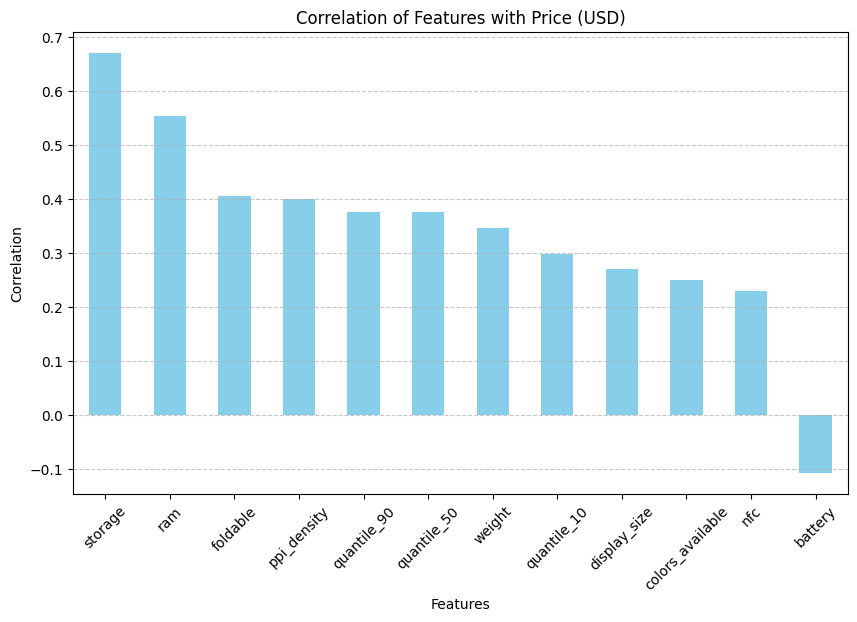

In [27]:
numeric_features = dtf.select_dtypes(include=['float64', 'int64'])
price_correlations = numeric_features.corr()['price_usd'].drop('price_usd')
print(price_correlations.sort_values(ascending=False))
plt.figure(figsize=(10, 6))
price_correlations.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Price (USD)")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **2. Data Analysis**

# **1. Price Distribution**


* Purpose: To understand the distribution of phone prices in USD, identifying whether prices are skewed (e.g., more low-cost or high-cost phones).

* Why Significant: Knowing the distribution of prices helps in categorizing phones into appropriate price ranges and identifying outliers.



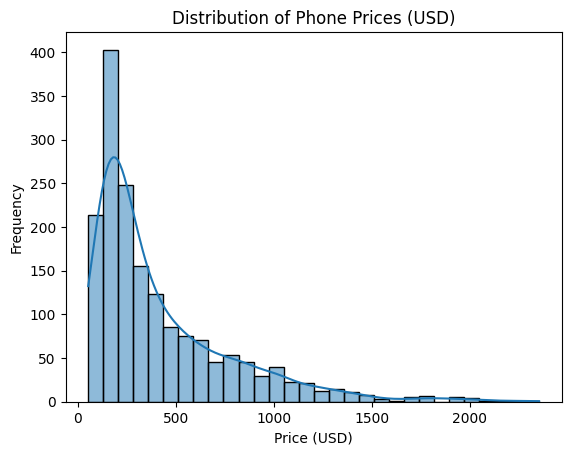

In [28]:
sns.histplot(dtf['price_usd'], kde=True, bins=30)
plt.title("Distribution of Phone Prices (USD)")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

* We suspect that there is a long tail, therefore we may have outliers. This is better demonstrated in a box plot:

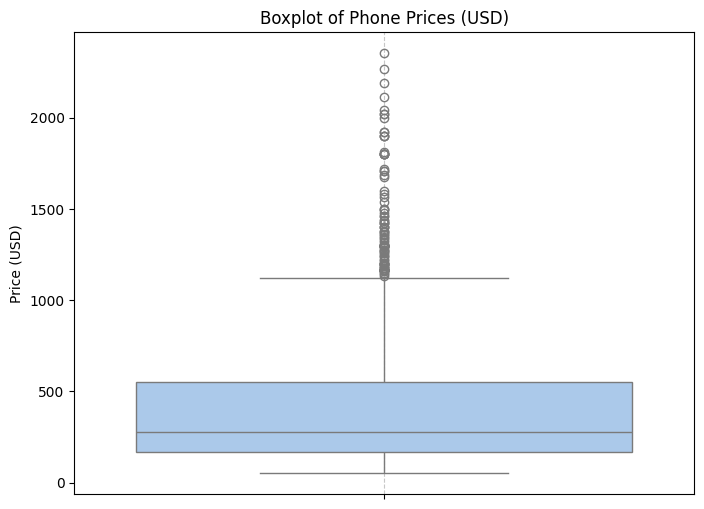

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dtf, y='price_usd', palette='pastel')
plt.title("Boxplot of Phone Prices (USD)")
plt.ylabel("Price (USD)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

* Based on the box plot, we can conclude that phones priced above approximately $1100 are classified as outliers due to their high cost. Identifying these outliers is crucial, as they can significantly influence our pipeline model. It’s essential to account for these anomalies during preprocessing to ensure they do not disproportionately skew the model's performance or predictions.

# **2. Price Range by Year**
* Purpose: To explore how phone prices have evolved over time.

* Why Significant: Helps to track technological advancements and shifts in market trends.

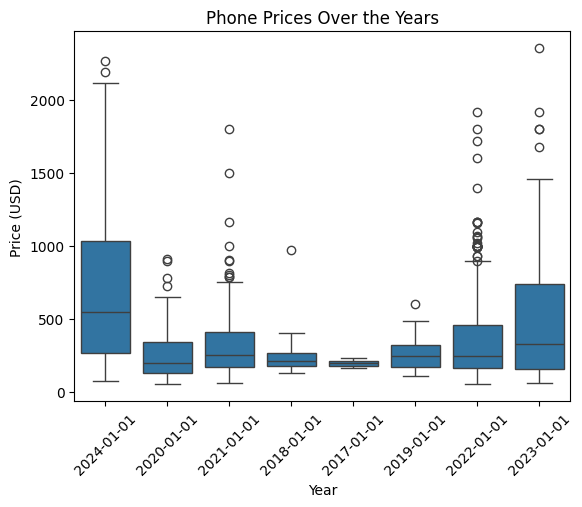

In [30]:
sns.boxplot(data=dtf, x='year', y='price_usd')
plt.title("Phone Prices Over the Years")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.show()

* based on the box plot, we observe an increasing variance in phone prices in recent years. This indicates that the price distribution has become more dispersed, reflecting a broader range of phone offerings, from budget-friendly models to high-end flagship devices.

As a result, models trained on historical data with lower variance may face challenges in accurately predicting prices for newer years, where the variance is significantly higher and the market dynamics are more complex.

# **3. Battery Capacity vs. Price**
* Purpose: To investigate whether phones with larger battery capacities are priced higher.

* Why Significant: Battery life is a key feature for consumers, and this can shed light on its importance relative to price.

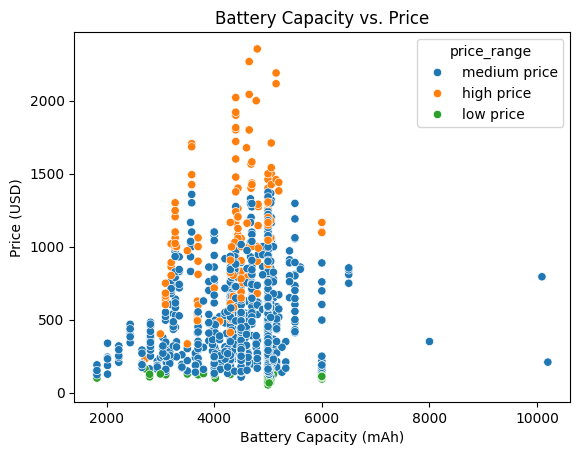

In [31]:
sns.scatterplot(data=dtf, x='battery', y='price_usd', hue='price_range')
plt.title("Battery Capacity vs. Price")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Price (USD)")
plt.show()

Based on this plot:

* Increasing Variance for Mid-Range Batteries: Phones with a battery capacity up to 6000 mAh show increasing variance in price as the battery capacity grows. This suggests that mid-range battery phones are available across a wider price spectrum, likely influenced by additional factors like brand, features, or other specifications.

* Smaller Variance for High-Capacity Batteries: For phones with a battery capacity greater than 6000 mAh, the variance in price is notably smaller. However, this is likely due to the small sample size of phones with such high-capacity batteries, which makes it harder to generalize.

This insight highlights the importance of considering both the distribution of battery capacities and the sample size when analyzing variance and making predictions.

# **4. Price vs. storage**
* Purpose: To see how storage correlate with price and identify trends in hardware configurations.

* Why Significant: Provides insights into how much consumers pay for better performance specs.

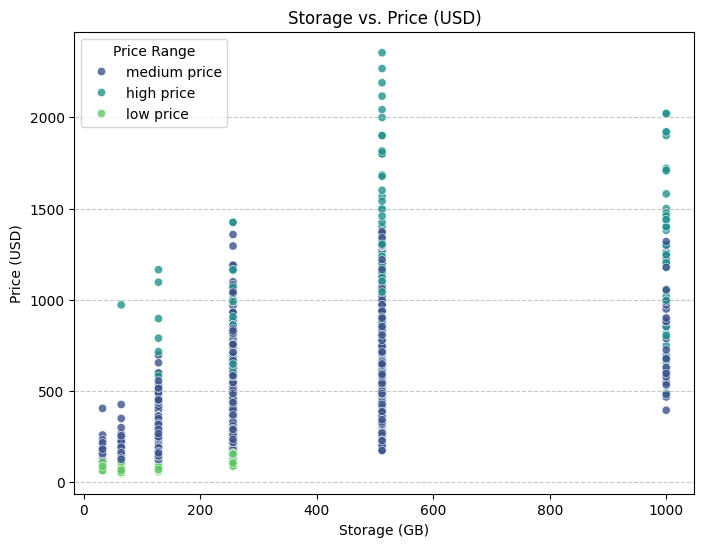

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dtf, x='storage', y='price_usd', hue='price_range', palette='viridis', alpha=0.8)
plt.title("Storage vs. Price (USD)")
plt.xlabel("Storage (GB)")
plt.ylabel("Price (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Price Range')
plt.show()


* At first glance, storage might seem like a continuous numeric feature, but based on the plot, it behaves more like a discrete feature. This is because storage capacity is typically available in fixed increments (e.g., 64GB, 128GB, 256GB,...), rather than being a smooth range of values.

* for larger storage capacities, we observe that the range of prices becomes wider, suggesting that phones with higher storage options span a broader price spectrum.

# **5. Price Range Breakdown by Manufacturer**
* Purpose: To understand which brands dominate specific price ranges.

* Why Significant: Highlights market segmentation and pricing strategies of major brands.

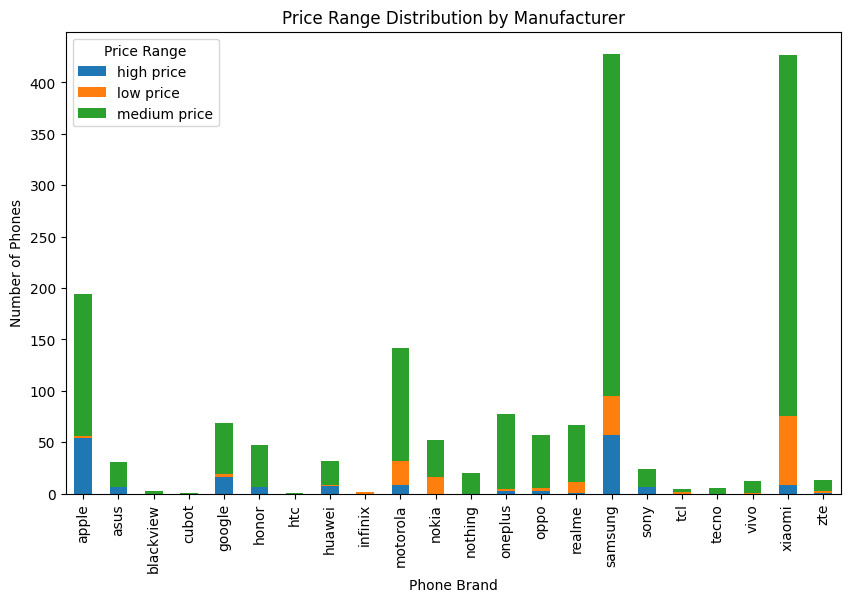

In [33]:
brand_price_range = dtf.groupby(['phone_brand', 'price_range']).size().unstack()
brand_price_range.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Price Range Distribution by Manufacturer")
plt.xlabel("Phone Brand")
plt.ylabel("Number of Phones")
plt.legend(title="Price Range")
plt.show()


based on this plot we can see that:
* the medium price range appears to be the most common across all brands, reflecting that many companies offer a variety of models targeting the mid-market segment, which is often the largest and most competitive.

* brands like Apple and Samsung might show a higher concentration of phones in the high price range, indicating that their products are more premium-priced.

* brands like Xiaomi, Oppo, or Motorola could have more phones in the low and medium price ranges, suggesting that these brands cater to a broader, more price-sensitive market.

# **3. Basic Model Pipeline**

* first, there are two features(cpu_core and gpu_company) containing null values so we decided to fill them with "Unknown" value.

In [34]:
dtf['cpu_core'].fillna('Unknown', inplace=True)
dtf['gpu_company'].fillna('Unknown', inplace=True)

In [35]:
dtf['os_main'] = dtf['os'].str.split(',').str[0]
dtf['os_main'] = dtf['os_main'].str.lower().apply(
    lambda x: 'ios' if 'ios' in x else ('android' if 'android' in x else 'other')
)
dtf = dtf.drop(columns=['os'], errors='ignore')
print(dtf.columns)

Index(['phone_brand', 'phone_model', 'store', 'price_usd', 'storage', 'ram',
       'launch_date', 'dimensions', 'weight', 'display_type', 'display_size',
       'display_resolution', 'nfc', 'usb', 'battery', 'features_sensors',
       'colors', 'video', 'chipset', 'cpu', 'gpu', 'year', 'foldable',
       'ppi_density', 'quantile_10', 'quantile_50', 'quantile_90',
       'price_range', 'os_type', 'os_version', 'battery_size',
       'colors_available', 'chip_company', 'cpu_core', 'gpu_company',
       'fingerprint', 'video_resolution', 'os_main'],
      dtype='object')


<Axes: xlabel='os_main'>

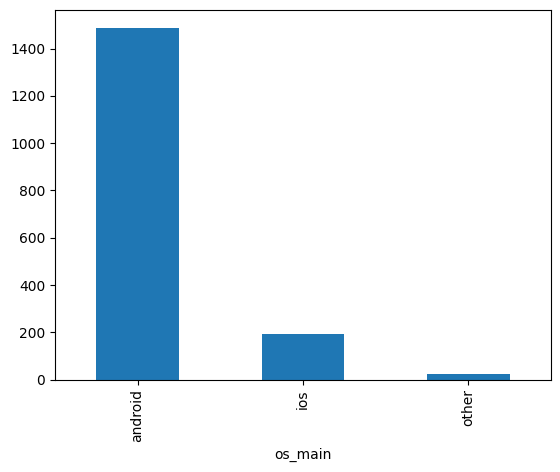

In [15]:
vc = dtf.os_main.value_counts()
vc.plot(kind='bar')

* now we will do:

 * **One-Hot Encoding:** Use for phone_brand, Display_Type, OS, USB, Colors, Chipset, CPU, GPU, price_range since they are likely non-ordinal.

 * **Frequency Encoding:** Use for high-cardinality features like Features_Sensors or Video if needed.



In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

selected_columns = [
    'storage', 'ram', 'foldable', 'ppi_density', 'quantile_90',
    'quantile_50', 'weight', 'quantile_10', 'display_size', 'colors_available',
    'nfc', 'battery', 'year', 'phone_brand', 'os_main'
]

dtf = dtf[selected_columns + ['price_usd']]
if 'year' in dtf.columns:
    dtf['year'] = pd.to_datetime(dtf['year'], errors='coerce').dt.year

one_hot_columns = ['phone_brand', 'os_main']
dtf = pd.get_dummies(dtf, columns=one_hot_columns, drop_first=True)

X = dtf.drop(columns=['price_usd'], errors='ignore')  # Features
y = dtf['price_usd']

X = X.apply(pd.to_numeric, errors='coerce')
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Training score:", model.score(X_train, y_train))
print("Testing score:", model.score(X_test, y_test))


Model training completed.
Training score: 0.6575648887918105
Testing score: 0.6492403290839894


# **4. Error Analysis**

In [18]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 159.05620488820645
Mean Squared Error (MSE): 50506.23638500179
R-squared (R²): 0.6492403290839894


* **Residual Analysis**

  The residuals are the differences between the predicted and actual values of the target variable. A plot of residuals can give insights into systematic errors (over or underestimation)

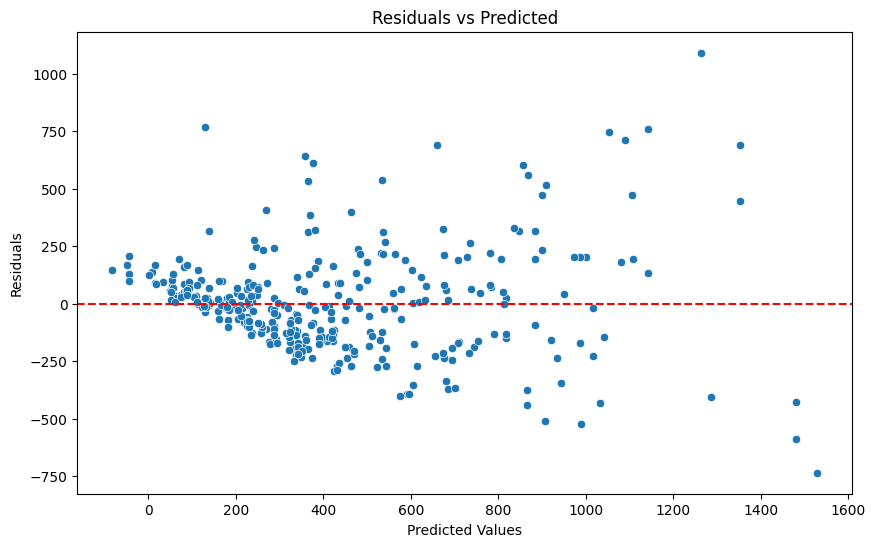

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

the model performs well when the price (y) is below 200, but struggles when the price (y) exceeds 200. our linear regression model might not be well-suited for predicting values in an extreme range, such as very high prices.


* **Evaluating Overestimation vs Underestimation**

In [20]:
overestimation = residuals[residuals < 0]
underestimation = residuals[residuals > 0]
print(f'Average Overestimation: {overestimation.mean()}')
print(f'Average Underestimation: {underestimation.mean()}')


Average Overestimation: -148.4788764941863
Average Underestimation: 170.53647595000882


the model is mostly underestimating the prices, as indicated by the higher average magnitude of underestimation (170.54) compared to overestimation (-148.48).

The model's tendency to underestimate could be due to several factors:

* Some important features might not be contributing as strongly as they should, or there might be missing relationships between the features and the target (price).

* Linear regression models can sometimes be biased if they are unable to fully capture complex non-linear relationships in the data.

* Outliers: If the high-priced phones are outliers or have noisy data, the model might struggle to predict them accurately, resulting in a tendency to underestimate prices for those items.

*  **Checking Feature Importance:**

In [21]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))


                        Coefficient
phone_brand_samsung    5.461323e+14
phone_brand_xiaomi     5.457069e+14
os_main_ios            3.998847e+14
phone_brand_motorola   3.479453e+14
phone_brand_oneplus    2.614829e+14
phone_brand_google     2.481333e+14
phone_brand_realme     2.446598e+14
phone_brand_oppo       2.263507e+14
phone_brand_nokia      2.165224e+14
phone_brand_honor      2.061601e+14
phone_brand_huawei     1.708767e+14
phone_brand_asus       1.682358e+14
phone_brand_sony       1.483364e+14
phone_brand_nothing    1.355727e+14
phone_brand_zte        1.095286e+14
phone_brand_vivo       1.052627e+14
phone_brand_tecno      6.808686e+13
phone_brand_tcl        6.091662e+13
phone_brand_blackview  5.277081e+13
phone_brand_infinix    4.309982e+13
phone_brand_htc        3.048511e+13
phone_brand_cubot      3.048511e+13
storage                8.391723e+01
ram                    8.374802e+01
year                   6.839208e+01
foldable               6.279331e+01
weight                 4.333

based on the feature coefficients, some features are indeed "sabotaging" the model, especially the ones with extremely large coefficients.
Some features, particularly the phone brand categories, have excessively large coefficients that are likely skewing the model’s behavior.